# Project: Investigate TMDB Movie Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

### Questions to answer:
<ul>
    <li>What genres are most popular form year to year?</li>
    <li>What kinds of properties are associated with movies that have high revenues?</li>
    <li>Did movie with higher budget have a better rating?</li>
    <li>Does genre correlate with higher revenue?</li>
    <li>(MAYBE) Did movie profit change throughout the years?</li>
</ul>

<ol>
    <li>Movie Analysis
        <ol type="I">
            <li>Number of movies produced throughout the years</li>
            <li>Runtime of movies throughout the years</li>
            <li>Runtime distribution of movies</li>
            <li>What produced genres are most popular form year to year?</li>
            <li>What genres are the most highly liked according to votes from year to year?</li>
            <li>Correlation between most produced genre and the most liked</li>
            <li>Genres and their average rating</li>
            <li>Director with most movies</li>
            <li>Actor with most movies</li>
        </ol>
    </li>    
    <li>Financial Analysis
        <ol type="I">
            <li>What kinds of properties are associated with movies that have high revenues?</li>
            <li>Movie with the most and least amount of profit</li>
            <li>Averge budget of movies throughout the years</li>
            <li>Did movie with higher budget have a better rating?</li>
            <li>Does genre correlate with higher revenue?</li>
        </ol>
    </li>
</ol>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
df_org = pd.read_csv('tmdb-movies.csv')

In [4]:
df_org.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [5]:
df_org.shape

(10866, 21)

In [6]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df_org.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df_org.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


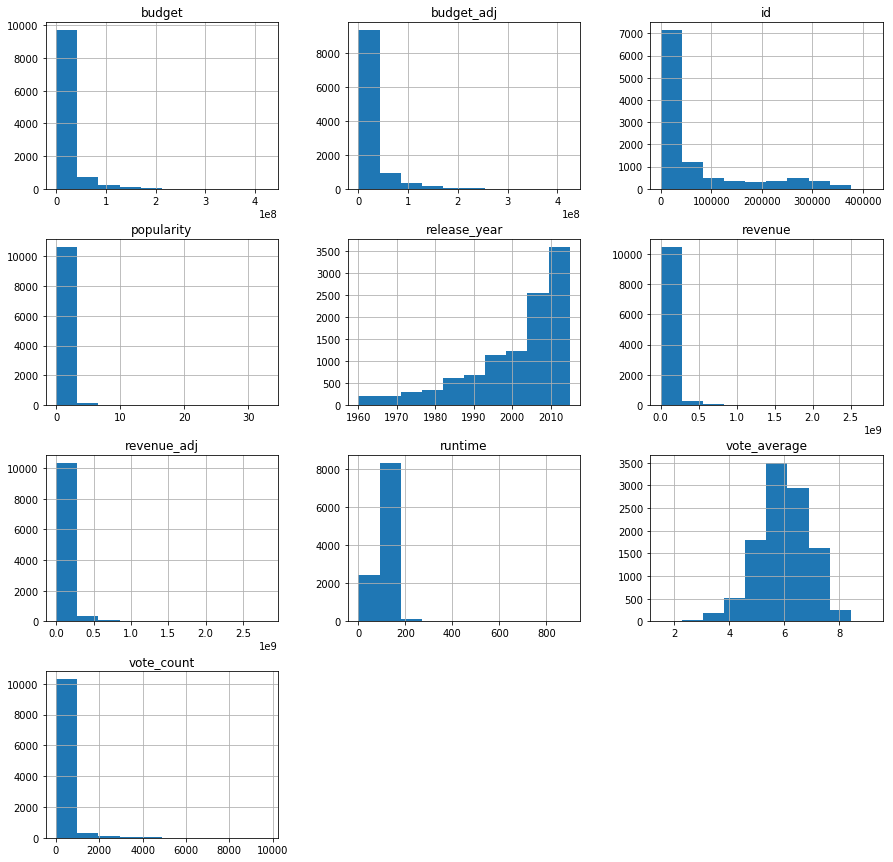

In [9]:
df_org.hist(figsize = (15,15));

#### First Impressions:

First of all, some columns have many values within them separated by a "|", namely:
<ul>
    <li>cast</li>
    <li>director</li>
    <li>keywords</li>
    <li>genres</li>
    <li>production_companies</li>
</ul>
These would need to be separated out for a better analysis.

There are a few columns that are not important for this analysis, these will be dropped.
<ul>
    <li>id</li>
    <li>imdb_id</li>
    <li>homepage</li>
    <li>tagline</li>
    <li>overview</li>
    <li>release_date</li>
    <li>keywords</li>
    <li>production_companies</li>
    <li>budget</li>
    <li>revenue</li>
</ul>

Last but not least, there are a lot NAN values, mainly in homepage and taglines, but these columns will be dropped. Once all NAN values of the remaining columns have been dropped, we would have a cleared picture of the situation.
Plus, there are also some rows with 0 in budget_adj and/or revenue_adj, which needs to be removed.

### Data Cleaning

Here, a copy of the original is first created with a deep copy so the original data will be untouched.

In [131]:
df = df_org.copy(deep=True)

In [132]:
#see if there are any duplicates, if true, then remove them
df.duplicated().sum()

1

In [133]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [134]:
#removing columns which won't be used in the analysis
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'release_date', 'keywords', 'production_companies', 'budget', 'revenue'], axis=1, inplace=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1018.6+ KB


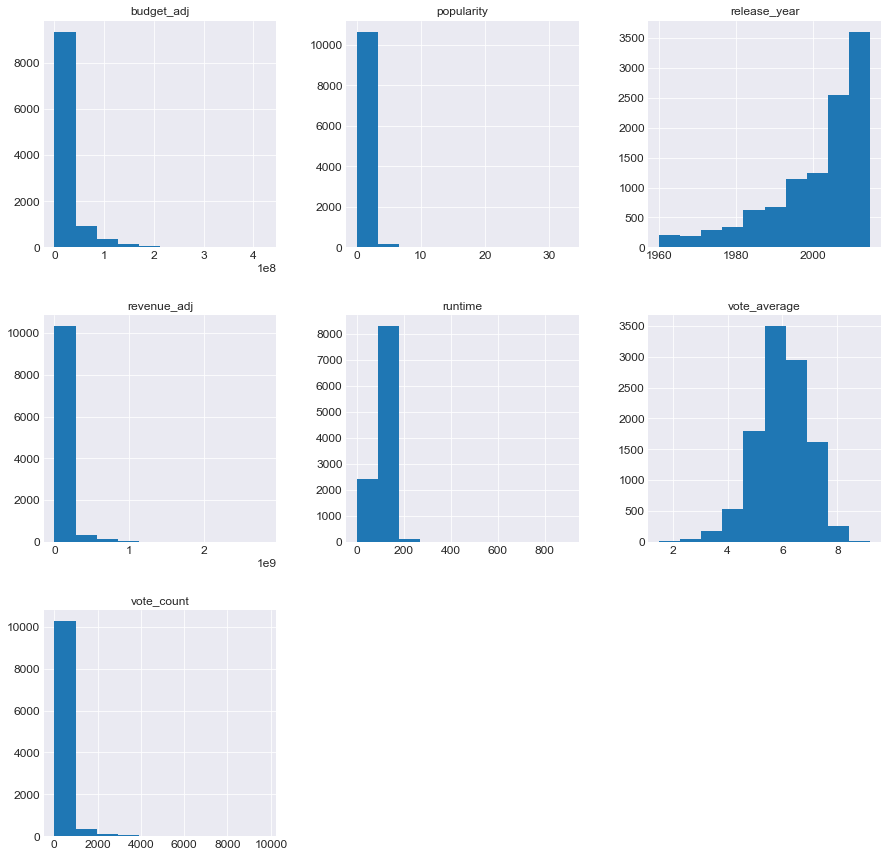

In [136]:
df.hist(figsize = (15,15));

Now, it looks like the numbers of NAN values have decreased drastically.
There are a lot of 0s in budget_adj, revenue_adj and also runtime, they need to be removed in order to have a proper analysis

In [137]:
#replacing all 0 with NAN
df.revenue_adj.replace(0, np.NAN, inplace=True)
df.budget_adj.replace(0, np.NAN, inplace=True)
df.runtime.replace(0, np.NAN, inplace=True)

In [138]:
df.isnull().sum()

popularity           0
original_title       0
cast                76
director            44
runtime             31
genres              23
vote_count           0
vote_average         0
release_year         0
budget_adj        5696
revenue_adj       6016
dtype: int64

In [139]:
df.dropna(inplace=True)

In [140]:
#Separating director, genres and cast into respective columns
df_cast = df['cast'].str.split('|', expand=True).rename(columns=lambda x:f'cast_{x+1}')
df_director = df['director'].str.split('|', expand=True).rename(columns=lambda x: f'director_{x+1}')
df_genre = df['genres'].str.split('|', expand=True).rename(columns=lambda x:f'genre_{x+1}')

In [141]:
#verifying they look all good
df_cast.columns, df_director.columns, df_genre.columns

(Index(['cast_1', 'cast_2', 'cast_3', 'cast_4', 'cast_5'], dtype='object'),
 Index(['director_1', 'director_2', 'director_3', 'director_4', 'director_5',
        'director_6', 'director_7', 'director_8', 'director_9', 'director_10',
        'director_11', 'director_12'],
       dtype='object'),
 Index(['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5'], dtype='object'))

In [142]:
#joining them back to the table
df = df.join([df_cast, df_director, df_genre])

In [143]:
#droping original columns
df.drop(['genres', 'cast', 'director'], axis=1, inplace=True)

In [144]:
#The numbers in revenue_adj and budget_adj are too big, and as part of a chart, simply is cumbersome to view, 
#so dividing them by 1,000,000 and creating new columns
df['rev_adj_m'] = df['revenue_adj']/1000000
df['bud_adj_m'] = df['budget_adj']/1000000

In [145]:
#Adding another column to calculate the gross profit of the movies
df['gross_profit'] = df['rev_adj_m'] - df['bud_adj_m']

The number of votes directly correlate to the representation of vote, so taking a closer look

In [146]:
df.vote_count.describe()

count   3849.00
mean     528.39
std      880.33
min       10.00
25%       71.00
50%      205.00
75%      581.00
max     9767.00
Name: vote_count, dtype: float64

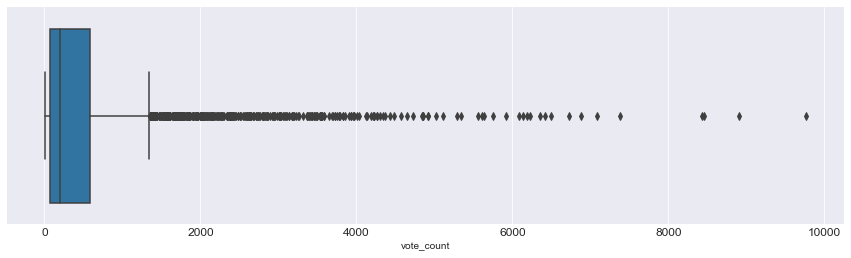

In [147]:
plt.figure(figsize=(15,4))
sns.boxplot(df.vote_count);

In [148]:
#running this query showed me that this is nothing wrong with the large number of votes, they are simply popular movies
df.query('vote_count > 7000')

,popularity,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast_1,cast_2,...,director_11,director_12,genre_1,genre_2,genre_3,genre_4,genre_5,rev_adj_m,bud_adj_m,gross_profit
1386,9.43,Avatar,162.00,8458,7.10,2009,240886902.89,2827123750.41,Sam Worthington,Zoe Saldana,...,None,None,Action,Adventure,Fantasy,Science Fiction,None,2827.12,240.89,2586.24
1919,9.36,Inception,148.00,9767,7.90,2010,160000000.00,825500000.00,Leonardo DiCaprio,Joseph Gordon-Levitt,...,None,None,Action,Thriller,Science Fiction,Mystery,Adventure,825.50,160.00,665.50
2875,8.47,The Dark Knight,152.00,8432,8.10,2008,187365527.25,1014733032.48,Christian Bale,Michael Caine,...,None,None,Drama,Action,Crime,Thriller,None,1014.73,187.37,827.37
4361,7.64,The Avengers,143.00,8903,7.30,2012,208943741.90,1443191435.21,Robert Downey Jr.,Chris Evans,...,None,None,Science Fiction,Action,Adventure,None,None,1443.19,208.94,1234.25
4364,5.94,Django Unchained,165.00,7375,7.70,2012,94974428.14,403991051.51,Jamie Foxx,Christoph Waltz,...,None,None,Drama,Western,None,None,None,403.99,94.97,309.02
4382,2.57,The Hunger Games,142.00,7080,6.70,2012,71230821.10,656473401.94,Jennifer Lawrence,Josh Hutcherson,...,None,None,Science Fiction,Adventure,Fantasy,None,None,656.47,71.23,585.24


Based on the box plot, most low volume counts look good, only the too high vote counts are considered outliers. But upon taking a closer look, they are to be expected given that they were really popular movies in the recent years.

<a id='eda'></a>
## Exploratory Data Analysis

In [149]:
#setting backgrounds and label sizes
sns.set_style('darkgrid')
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12)

### Research Question 1 Movie Analysis
#### 1 - A. Number of Movies Produced Throughout the Years

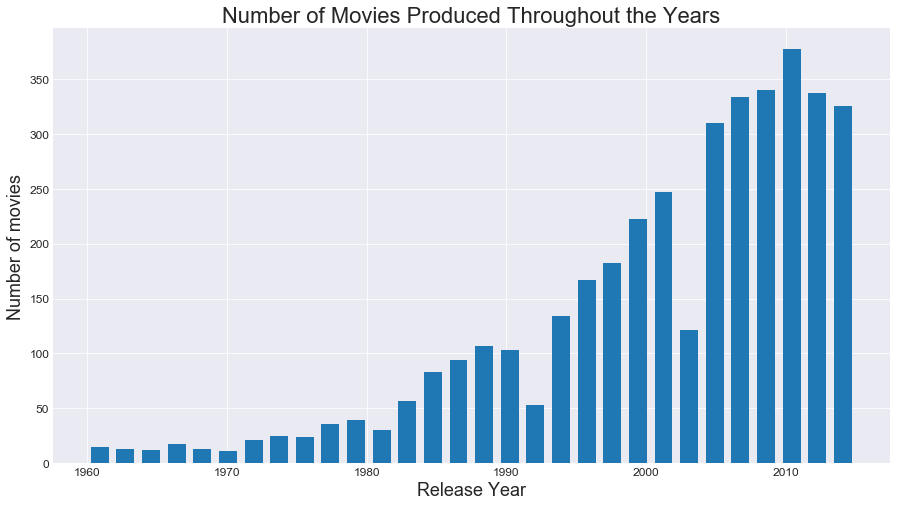

In [150]:
plt.figure(figsize=(15,8))
plt.hist(df['release_year'], rwidth = 0.7, bins = 30)
plt.title('Number of Movies Produced Throughout the Years', fontsize = 22)
plt.xlabel('Release Year', fontsize = 18)
plt.ylabel('Number of movies', fontsize = 18);

It can be clearly see that there are more and more movies produced throughout the years, peaking at around 2010, witha  downward trajectory in the more recent years.

This metric is very important for further analysis as this will helps us understand much better, expescially when calculations are done on the earlier years, since the small amount of movies also means that any average can be easily skewed.

#### 1-  B. Average Runtime of Movies Throughout the Years

In [151]:
mean_runtime = df.groupby('release_year')['runtime'].mean()

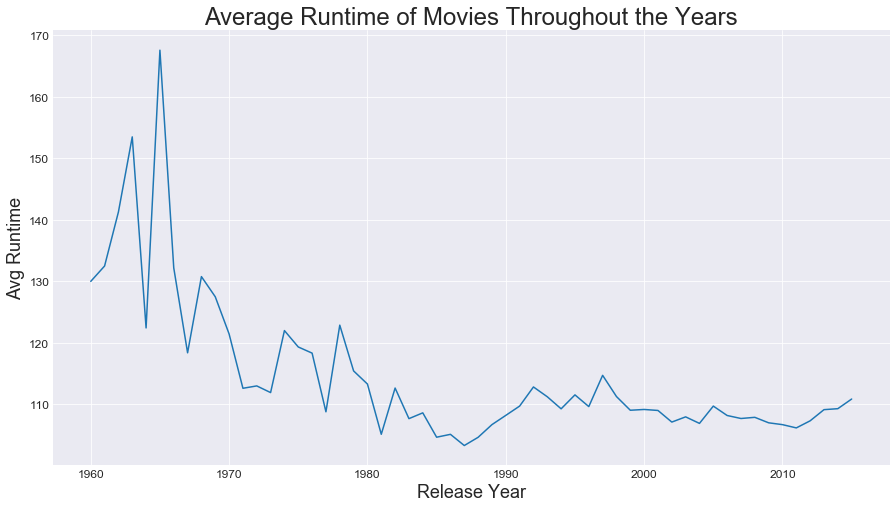

In [152]:
plt.figure(figsize=(15,8))
plt.plot(mean_runtime)
plt.title('Average Runtime of Movies Throughout the Years', fontsize = 24)
plt.xlabel('Release Year', fontsize = 18)
plt.ylabel('Avg Runtime', fontsize = 18);

The runtime of movies were on average longer in the past, and stabilizing itself in recent years to around 110 minutes per feature film.
The reason for the high average runtime of the past can be explained by the low number of movies produced in the past, where one or a few extra long movies can easily skew the average

#### 1 - C. Runtime distribution of movies

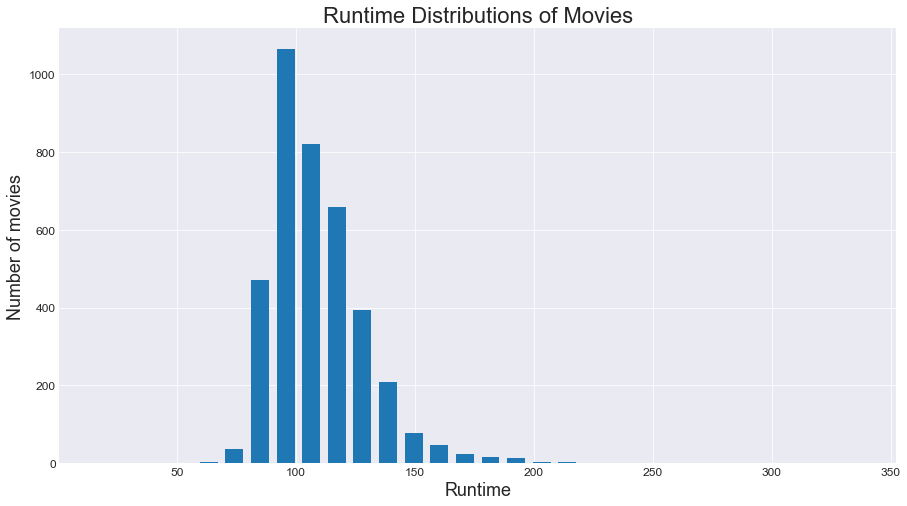

In [153]:
plt.figure(figsize=(15,8))
plt.hist(df['runtime'], rwidth = 0.7, bins = 30)
plt.title('Runtime Distributions of Movies', fontsize = 22)
plt.xlabel('Runtime', fontsize = 18)
plt.ylabel('Number of movies', fontsize = 18);

Most of the movies are around the 100 minutes range, which is consistent with what's being found with runtime by year and number of movies produced by year. We can take a closer with by finding it's percentage distribution, and this can be best represented through a box graph.

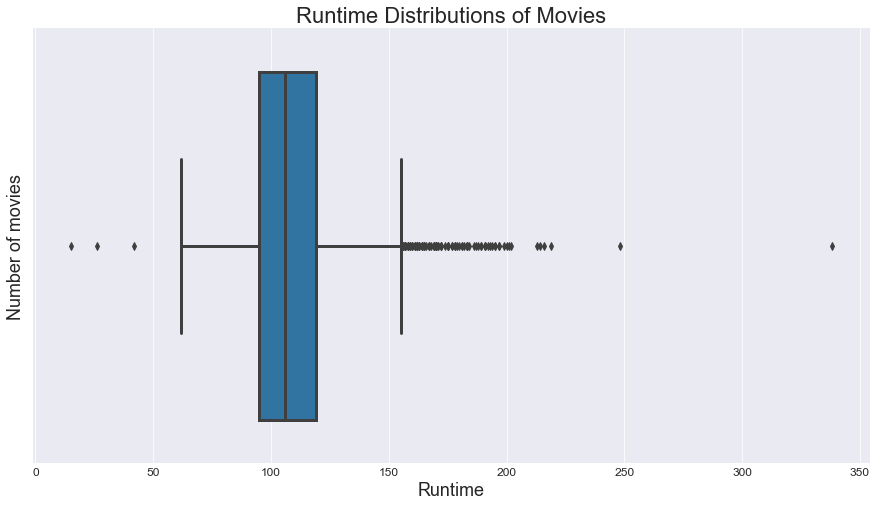

In [154]:
plt.figure(figsize=(15,8))
sns.boxplot(df['runtime'], linewidth = 3)
plt.title('Runtime Distributions of Movies', fontsize = 22)
plt.xlabel('Runtime', fontsize = 18)
plt.ylabel('Number of movies', fontsize = 18);

In [155]:
df['runtime'].describe()

count   3849.00
mean     109.22
std       19.91
min       15.00
25%       95.00
50%      106.00
75%      119.00
max      338.00
Name: runtime, dtype: float64

The describe function gives a numeric values to the box plot.

As we can see from the plot itself, there is one movie that was particularly long, and another on that was particularly short, with the average at 106 minutes, and half of them between 95 minutes and 119 minutes. Given that the size of the box within the box plot is relatively smaller when compared to the max/min, we can see that the average length of more than half the movies does not vary that much.

#### 1 - D. Most popular produced genres year to year

In [156]:
#Creating new dataframe containing only the genres and release year
df_genres = df.loc[:, 'genre_1':'genre_5']
df_genres = df_genres.join(df['release_year'])
df_genres.head(1)

,genre_1,genre_2,genre_3,genre_4,genre_5,release_year
0,Action,Adventure,Science Fiction,Thriller,None,2015


In [157]:
#get the list of unique years
years = df_genres.release_year.unique()

#Since genre are in multiple columns, aggregating them by year, and counting the max
#Appending the result to a list, to which a datafram is then formed
most_produced = []

for year in years:
    a = df_genres[df_genres.release_year == year]
    b = a.drop(['release_year'], axis = 1)
    c = b.stack().value_counts().idxmax()  
    most_produced.append((year, c))

#Dataframe containing produced genres sorted by year
produced_genres = pd.DataFrame(most_produced, columns = ['Year', 'Most_Produced_Genres']).sort_values('Year').reset_index().drop(['index'], axis=1)

In [158]:
#Datafram for easier to produce pie chart
genres_pie = produced_genres['Most_Produced_Genres'].value_counts().rename_axis('Genres').reset_index(name='Counts')
genres_pie

,Genres,Counts
0,Drama,38
1,Comedy,11
2,Thriller,3
3,Adventure,1
4,Western,1
5,Crime,1
6,Action,1


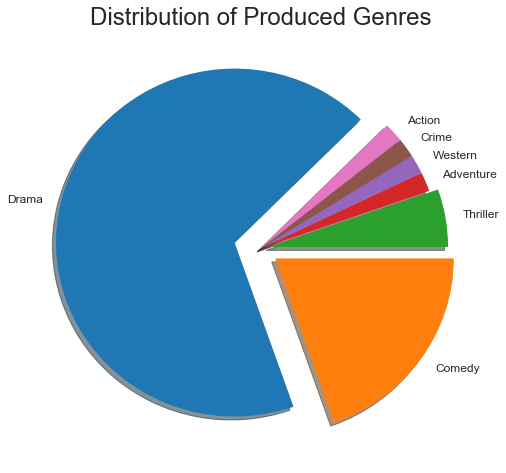

In [159]:
plt.figure(figsize=(8,8))
plt.title('Distribution of Produced Genres', fontsize = 24)
plt.pie(genres_pie['Counts'], labels = genres_pie['Genres'], explode=(0.15,0.1,0.05,0,0,0,0), shadow=True, startangle=45);

As this above graph shows, most of year, the popular choice of producers are to make drama movies, with comedy following a close second. Now, let's investigate and see what are the most liked genre (high vote) throughout the years.

#### 1 - E. Most liked genres (high vote) from year to year

In [160]:
#Creating new dataframe containing the genres as a single column
df_v_gen = df.loc[:, 'vote_average':'release_year'].join(df['genre_1'])
df_v_gen.rename(columns = {'genre_1':'genre'}, inplace=True)

for n in range (2,6):
    x = df.loc[:, 'vote_average':'release_year'].join(df[f'genre_{n}'])
    x.rename(columns = {f'genre_{n}':'genre'}, inplace=True)
    df_v_gen = df_v_gen.append(x)

#Generaling list of unique genres    
genre_total = df_v_gen['genre'].unique()
x_none = np.where(genre_total ==  None)
genre_total = np.delete(genre_total, x_none)

#Generating a dataframe containing the years with their highest liked genres
high_voted = []

for year in years:
    a = df_v_gen[df_v_gen.release_year == year]
    b = a.groupby('genre').vote_average.mean().idxmax()
    high_voted.append((year, b))

high_voted_genres = pd.DataFrame(high_voted, columns = ['Year', 'Most_Liked_Genres']).sort_values('Year').reset_index().drop(['index'], axis=1)

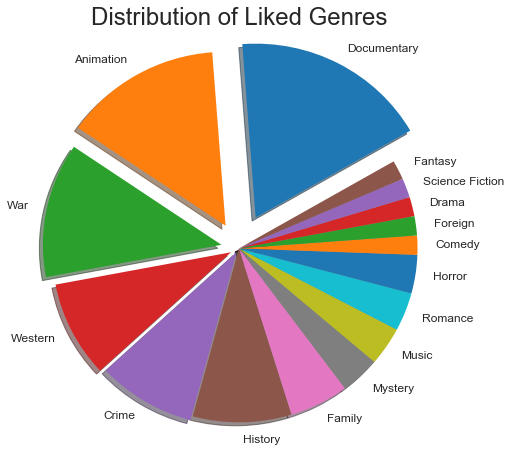

In [161]:
#Generating a dataframe to better illustrate the pie chart
likes_pie = high_voted_genres['Most_Liked_Genres'].value_counts().rename_axis('Genres').reset_index(name='Counts')

plt.figure(figsize=(8,8))
plt.title('Distribution of Liked Genres', fontsize = 24)
plt.pie(likes_pie['Counts'], labels = likes_pie['Genres'], explode=(0.2,0.15,0.1,0.05,0.025,0,0,0,0,0,0,0,0,0,0,0), shadow=True, startangle=30);

As the pie charts illustrate, the choice of the people are much more varied than the choice of the producers. Throughout the years, they have given the highest rating the most of the times to documentaries, followed by animation and then war movies. It begs the question: How many year where the most produced genre was also the most liked genre? 

#### 1 - F. Most produced genre vs most liked genre, year over year

In [162]:
genres_analysis = high_voted_genres.merge(produced_genres, how='left', on='Year')

In [163]:
genres_analysis['equal'] = np.where(genres_analysis['Most_Liked_Genres'] == genres_analysis['Most_Produced_Genres'], 'yes', 'no')
genres_analysis.equal.value_counts()

no     54
yes     2
Name: equal, dtype: int64

Surprisingly, or maybe unsurprisingly for some, only 2 years out of 56 that the most produced movies was also the highest liked movies.

#### 1 - G. Genres and their average rating

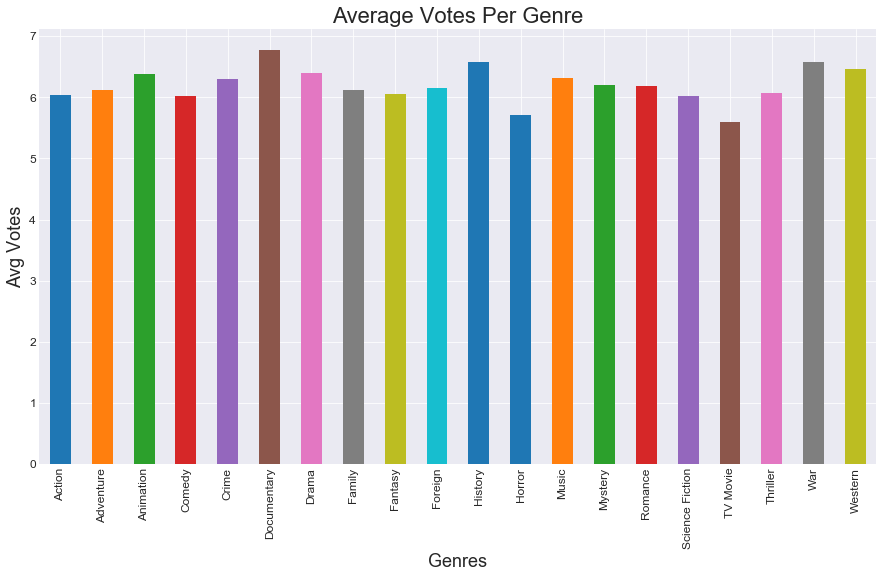

In [164]:
#To answer this question, we can re-use the dataframe df_v_gen from the previous question
genre_vote = df_v_gen.groupby('genre')['vote_average'].mean()
plt.figure(figsize=(15,8))
genre_vote.plot(kind='bar')
plt.title('Average Votes Per Genre', fontsize = 22)
plt.xlabel('Genres', fontsize = 18)
plt.ylabel('Avg Votes', fontsize = 18);

The rating does not vary that much from genre to genre, although, a documentary, history or war movies will tend to have better raiting.

#### 1 - H. Director with most movies, and their average raiting

In [165]:
#Creating dataframe containing list of directors and their gross profit, which will be used for a financial analysis later
df_dir = pd.DataFrame(df.loc[:, 'original_title']).join(df['director_1']).join(df['vote_average']).join(df['gross_profit'])
df_dir.rename(columns = {'director_1':'director'}, inplace=True)

for n in range (2,13):
    x = pd.DataFrame(df.loc[:, 'original_title']).join(df[f'director_{n}']).join(df['vote_average']).join(df['gross_profit'])
    x.rename(columns = {f'director_{n}':'director'}, inplace=True)
    df_dir = df_dir.append(x)

df_dir.dropna(inplace=True)
df_dir.drop_duplicates(inplace=True)

In [166]:
#Creating a list of all the directors
directors_total = df_dir['director'].unique()
d_none = np.where(directors_total ==  None)
directors_total = np.delete(directors_total, x_none)

df_dir_list = []
for director_a in directors_total:
    a = df_dir[df_dir.director == director_a]
    c = a.groupby('director').vote_average.mean()
    b = a.groupby('director')['original_title'].nunique()
    df_dir_list.append((director_a, b[0], c[0]))

In [167]:
df_dir_vote = pd.DataFrame(df_dir_list, columns = ['director', 'number_movies', 'avg_votes']).sort_values('number_movies', ascending=False).reset_index().drop(['index'], axis=1)

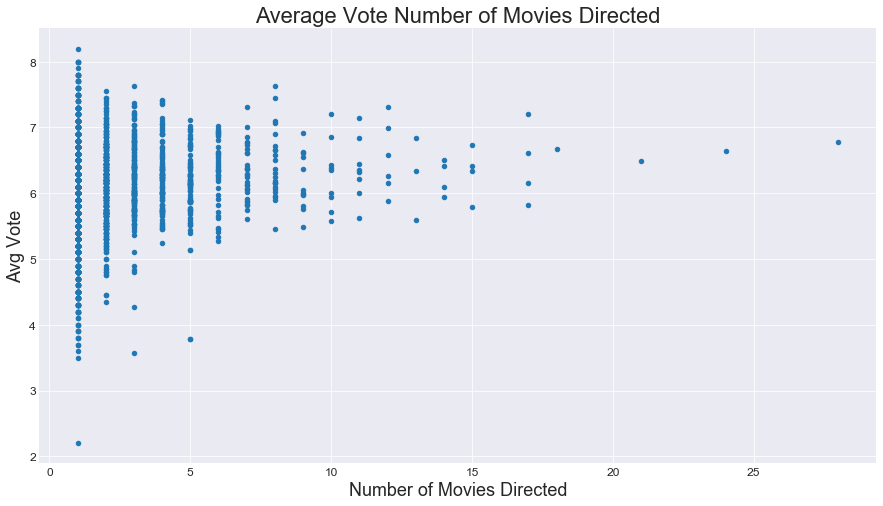

In [220]:
df_dir_vote.plot(x='number_movies', y='avg_votes', kind='scatter', figsize=(15,8))
plt.title('Average Vote Number of Movies Directed', fontsize = 22)
plt.xlabel('Number of Movies Directed', fontsize = 18)
plt.ylabel('Avg Vote', fontsize = 18);

This scatterplot shows that there is no clear correlation between the number of movies directed that the average votes of the movies. Although it can be seen that the more a director makes movies, the closer it gets to the average rating. Which can be used to conclude that people's opinion tend to drift toward somewhere beween 6.5 and 7 for a movie. Which can also be related in real life, that you get better at what you do the more you do it. But the inverse is also true, given that there are polarizing opinions about anything, the more you do, the more polarizing opinions a person will get, therefore not contributing to a positiive correlation between number of movies produced and the average raitings.

In [169]:
df_dir_vote.query('number_movies > 15')

,director,number_movies,avg_votes
0,Steven Spielberg,28,6.79
1,Clint Eastwood,24,6.64
2,Ridley Scott,21,6.50
3,Woody Allen,18,6.68
4,Steven Soderbergh,17,6.15
5,Robert Rodriguez,17,5.82
6,Martin Scorsese,17,7.20
7,Tim Burton,17,6.61


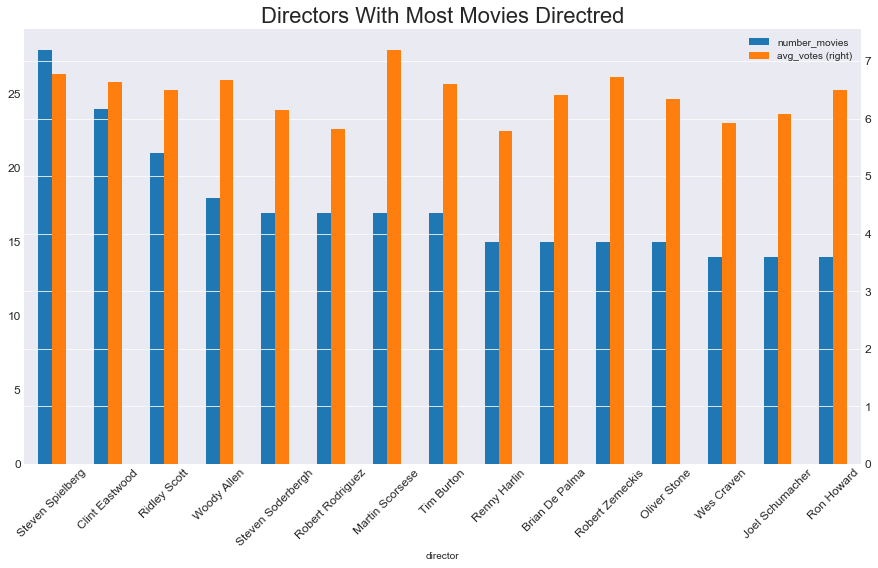

In [221]:
df_p_dir = df_dir_vote.iloc[:15]
df_p_dir.plot(x='director', y=['number_movies','avg_votes'], kind='bar', rot=45, figsize=(15,8), secondary_y='avg_votes')
plt.title('Directors With Most Movies Directred', fontsize = 22)
plt.xlabel('Directors', fontsize = 18);

Here it can be seen that director does have a role in the average raiting of a movie. If you want a highly liked movie, it's better to use Martin Scorsese as the director.

#### 1 - I. Actor with most movies, and their average raiting

In [184]:
#Creating dataframe with the list of actors containing average rating and gross profit, to be used later
df_cast = pd.DataFrame(df.loc[:, 'original_title']).join(df['cast_1']).join(df['vote_average']).join(df['gross_profit'])
df_cast.rename(columns = {'cast_1':'cast'}, inplace=True)

for n in range (2,6):
    x = pd.DataFrame(df.loc[:, 'original_title']).join(df[f'cast_{n}']).join(df['vote_average']).join(df['gross_profit'])
    x.rename(columns = {f'cast_{n}':'cast'}, inplace=True)
    df_cast = df_cast.append(x)

df_cast.dropna(inplace=True)
df_cast.drop_duplicates(inplace=True)

#creating list of unique actors
cast_total = df_cast['cast'].unique()
d_none = np.where(cast_total ==  None)
cast_total = np.delete(cast_total, x_none)

df_cast_list = []
for cast_a in cast_total:
    a = df_cast[df_cast.cast == cast_a]
    c = a.groupby('cast').vote_average.mean()
    b = a.groupby('cast')['original_title'].nunique()
    df_cast_list.append((cast_a, b[0], c[0]))

In [185]:
df_cast_vote = pd.DataFrame(df_cast_list, columns = ['cast', 'number_movies', 'avg_votes']).sort_values('number_movies', ascending=False).reset_index().drop(['index'], axis=1)

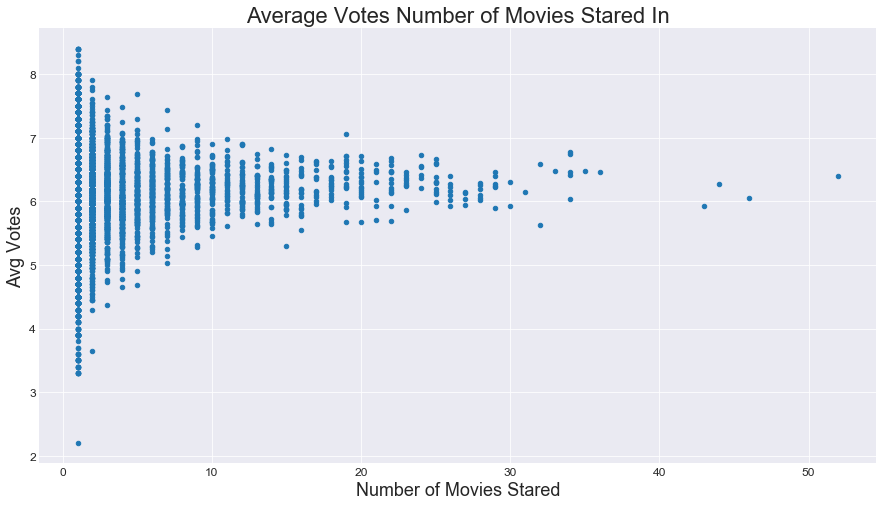

In [186]:
df_cast_vote.plot(x='number_movies', y='avg_votes', kind='scatter', figsize=(15,8))
plt.title('Average Votes Number of Movies Stared In', fontsize = 22)
plt.xlabel('Number of Movies Stared', fontsize = 18)
plt.ylabel('Avg Votes', fontsize = 18);

In [187]:
df_cast_vote.query('number_movies > 40')

,cast,number_movies,avg_votes
0,Robert De Niro,52,6.40
1,Bruce Willis,46,6.05
2,Samuel L. Jackson,44,6.27
3,Nicolas Cage,43,5.92


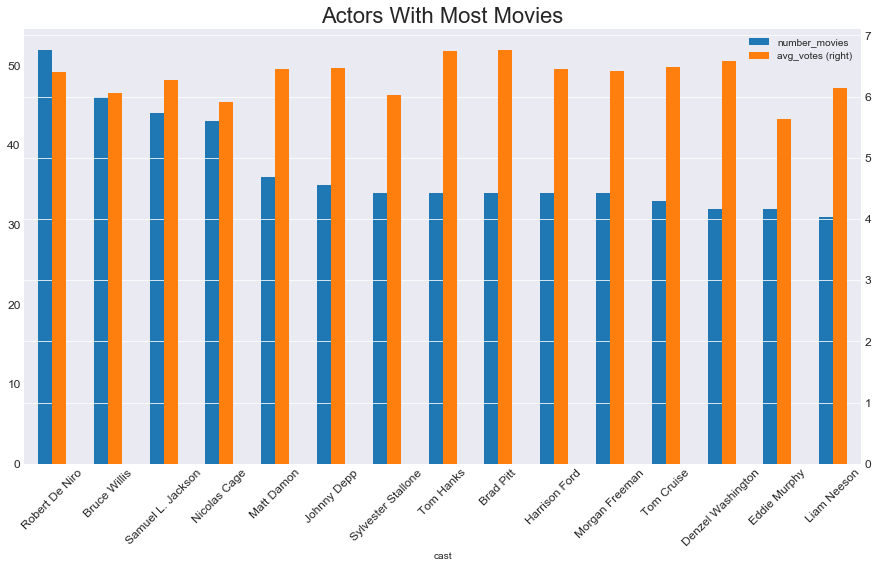

In [222]:
df_p_cast = df_cast_vote.iloc[:15]
df_p_cast.plot(x='cast', y=['number_movies','avg_votes'], kind='bar', rot=45, figsize=(15,8), secondary_y='avg_votes')
plt.title('Actors With Most Movies', fontsize = 22)
plt.xlabel('Actors', fontsize = 18);

The same that was said about the movie directors, where the number of movies a person stared in does not have a positive nor negative correlation with the average rating. 

According to the latest graph, if you want a movie to be well liked, it is important to have either Tom Hanks, Bradd Pitt, Denzel Washington or Robert De Niro.

#### Part 1 Conclusion:
In order to have a well liked movies with the highest rating, some important factors to consider are to produce either a documentary, war, animation or western movie, with Martin Scorsese or Robert Zimickis as the director, featuring either Tom Hanks, Bradd Pitt, Denzel Washington or Robert De Niro.

I would totally go see that movie!

### Research Question 2  Financial Analysis

#### 2 - A. Average gross profit analysis

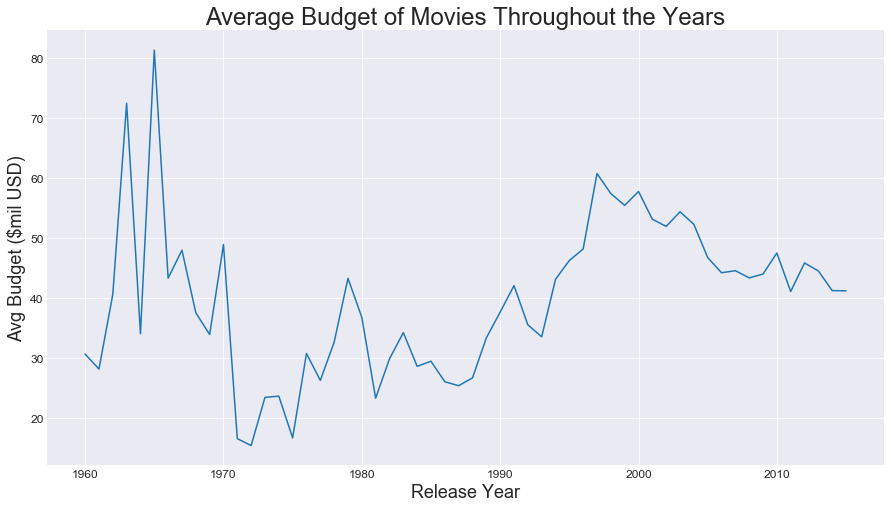

In [457]:
#In order to fully understand that question, let's first look at the avg budget of movies
mean_budget = df.groupby('release_year')['bud_adj_m'].mean()
plt.figure(figsize=(15,8))
plt.plot(mean_budget)
plt.title('Average Budget of Movies Throughout the Years', fontsize = 24)
plt.xlabel('Release Year', fontsize = 18)
plt.ylabel('Avg Budget ($mil USD)', fontsize = 18);

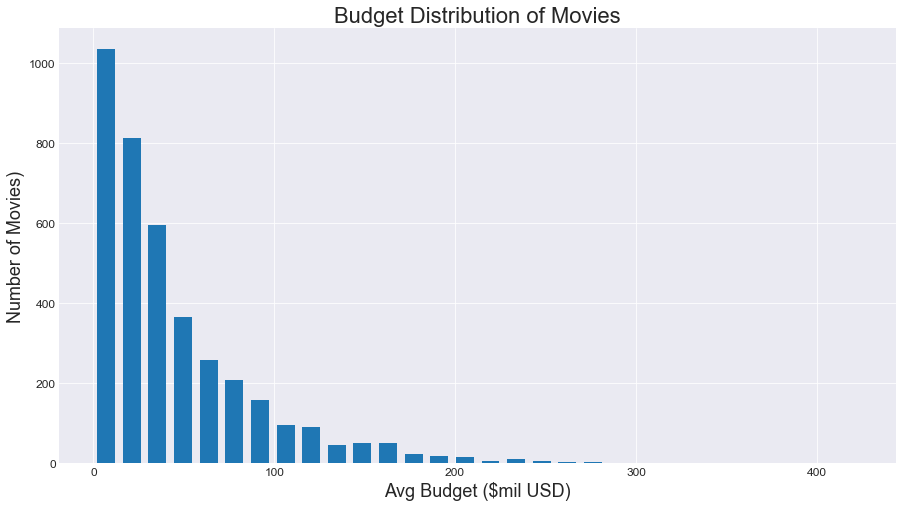

In [196]:
#And also at the budget distribution of the movies
plt.figure(figsize=(15,8))
plt.hist(df['bud_adj_m'], rwidth = 0.7, bins = 30)
plt.title('Budget Distribution of Movies', fontsize = 22)
plt.xlabel('Avg Budget ($mil USD)', fontsize = 18)
plt.ylabel('Number of Movies)', fontsize = 18);

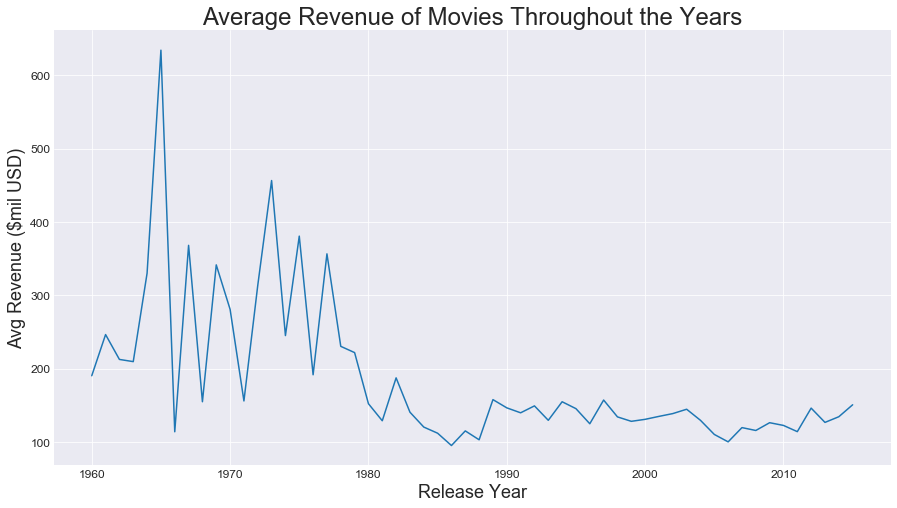

In [192]:
#The average revenue should also be considered
mean_budget = df.groupby('release_year')['rev_adj_m'].mean()
plt.figure(figsize=(15,8))
plt.plot(mean_budget)
plt.title('Average Revenue of Movies Throughout the Years', fontsize = 24)
plt.xlabel('Release Year', fontsize = 18)
plt.ylabel('Avg Revenue ($mil USD)', fontsize = 18);

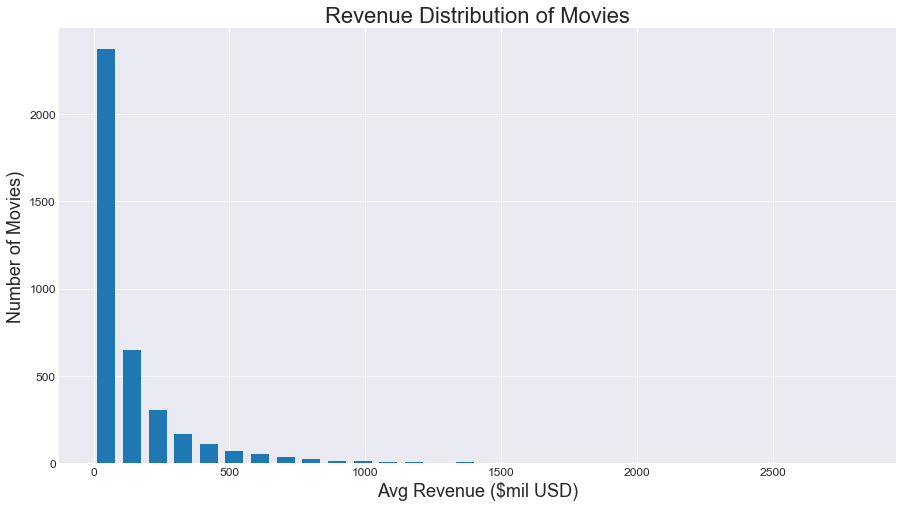

In [197]:
#Here, the revenue distribution will give a good idea of the movie industry landscape
plt.figure(figsize=(15,8))
plt.hist(df['rev_adj_m'], rwidth = 0.7, bins = 30)
plt.title('Revenue Distribution of Movies', fontsize = 22)
plt.xlabel('Avg Revenue ($mil USD)', fontsize = 18)
plt.ylabel('Number of Movies)', fontsize = 18);

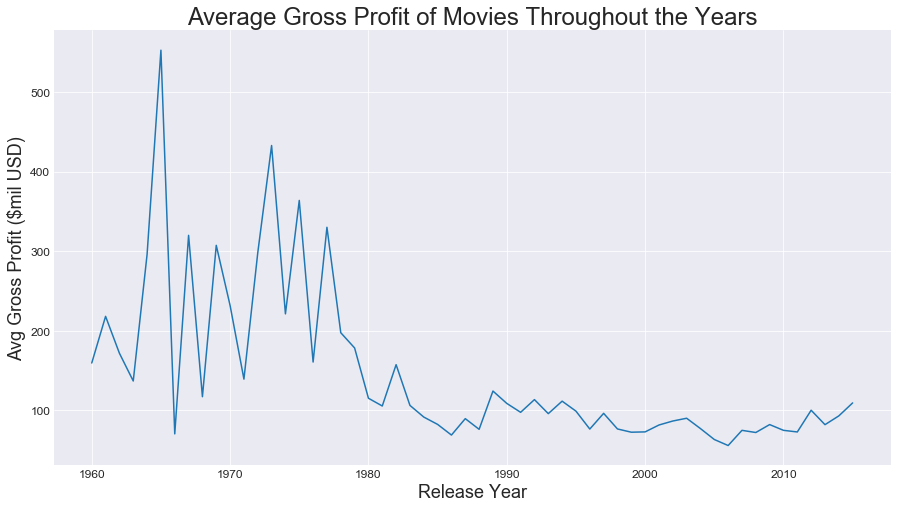

In [194]:
#Self-explanatory
mean_budget = df.groupby('release_year')['gross_profit'].mean()
plt.figure(figsize=(15,8))
plt.plot(mean_budget)
plt.title('Average Gross Profit of Movies Throughout the Years', fontsize = 24)
plt.xlabel('Release Year', fontsize = 18)
plt.ylabel('Avg Gross Profit ($mil USD)', fontsize = 18);

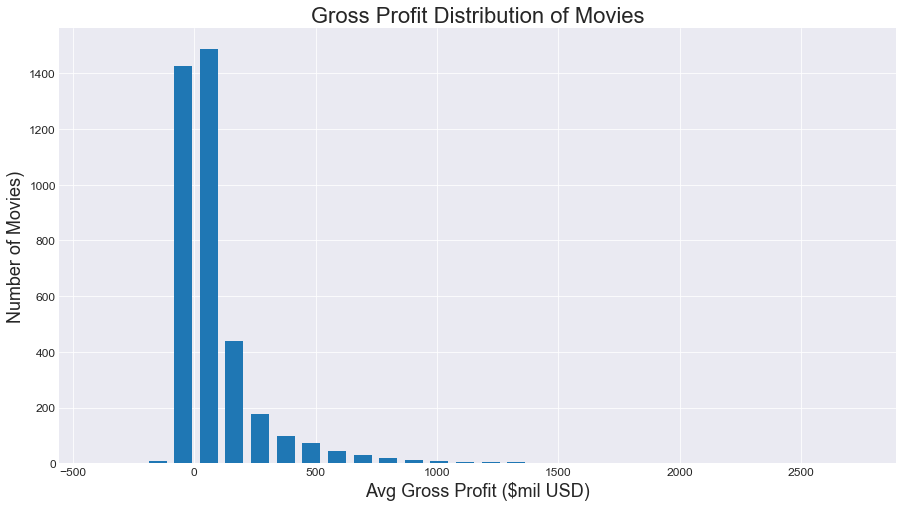

In [195]:
#The distribution of gross profit
plt.figure(figsize=(15,8))
plt.hist(df['gross_profit'], rwidth = 0.7, bins = 30)
plt.title('Gross Profit Distribution of Movies', fontsize = 22)
plt.xlabel('Avg Gross Profit ($mil USD)', fontsize = 18)
plt.ylabel('Number of Movies)', fontsize = 18);

This graph's result is what expected to be seen, as it looks a lot like a juxataposition of the avgerage budget and average revenue, which is basically what the gross profit is. We can see that it's a normal distributiuon with a tail to the right, meaning hardly any movies really lose a lot of money, buyt that it does exist.

#### 2 - B. Did movie with higher budget have a better rating? What about higher revenue?

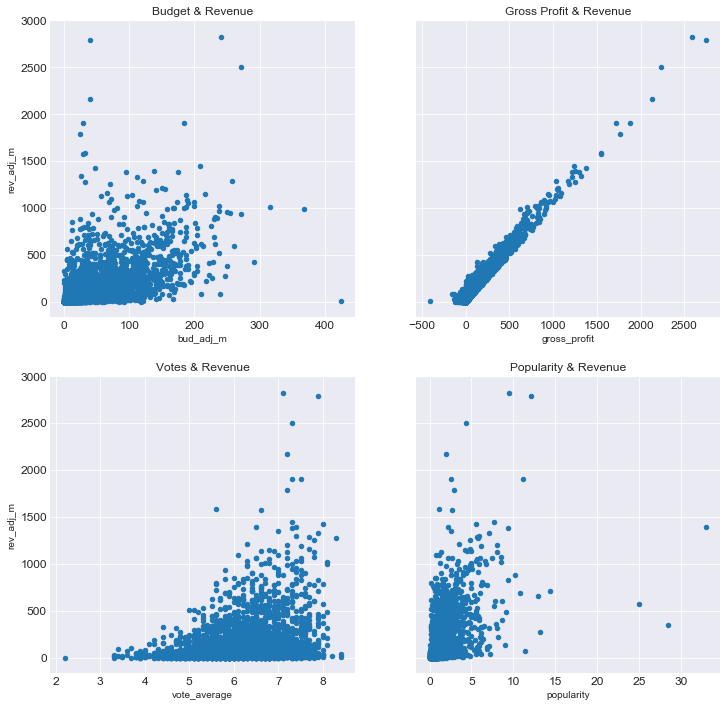

In [469]:
#diving deeper into budget & revenu's correlation with other key metrics
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 12), sharey=True)

df.plot.scatter('bud_adj_m','rev_adj_m', ax=axes[0,0], title = 'Budget & Revenue')
df.plot.scatter('gross_profit', 'rev_adj_m', ax=axes[0,1], title = 'Gross Profit & Revenue')
df.plot.scatter('vote_average', 'rev_adj_m', ax=axes[1,0], title = 'Votes & Revenue')
df.plot.scatter('popularity', 'rev_adj_m', ax=axes[1,1], title = 'Popularity & Revenue');

7

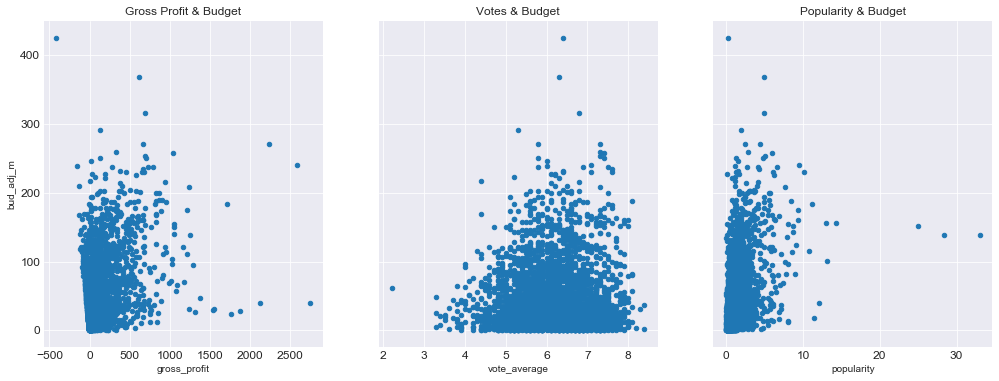

In [477]:
fig, axes = plt.subplots(ncols = 3, figsize=(17, 6), sharey=True)

df.plot.scatter('gross_profit', 'bud_adj_m', ax=axes[0], title = 'Gross Profit & Budget')
df.plot.scatter('vote_average', 'bud_adj_m', ax=axes[1], title = 'Votes & Budget')
df.plot.scatter('popularity', 'bud_adj_m', ax=axes[2], title = 'Popularity & Budget');7

The budget of the movie has no correlation with the revenue of the movie. Nor does it have any correlation to the average votes and popularity. The same goes for revenue. 

#### 2 - C. Average Gross Profit Per Genre

In [488]:
#utiliszing the dataframe crated in section 1
df_gen_gp = pd.DataFrame(df.loc[:, 'gross_profit']).join(df['genre_1'])
df_gen_gp.rename(columns = {'genre_1':'genre'}, inplace=True)

for n in range (2,6):
    x = pd.DataFrame(df.loc[:, 'gross_profit']).join(df[f'genre_{n}'])
    x.rename(columns = {f'genre_{n}':'genre'}, inplace=True)
    df_gen_gp = df_gen_gp.append(x)

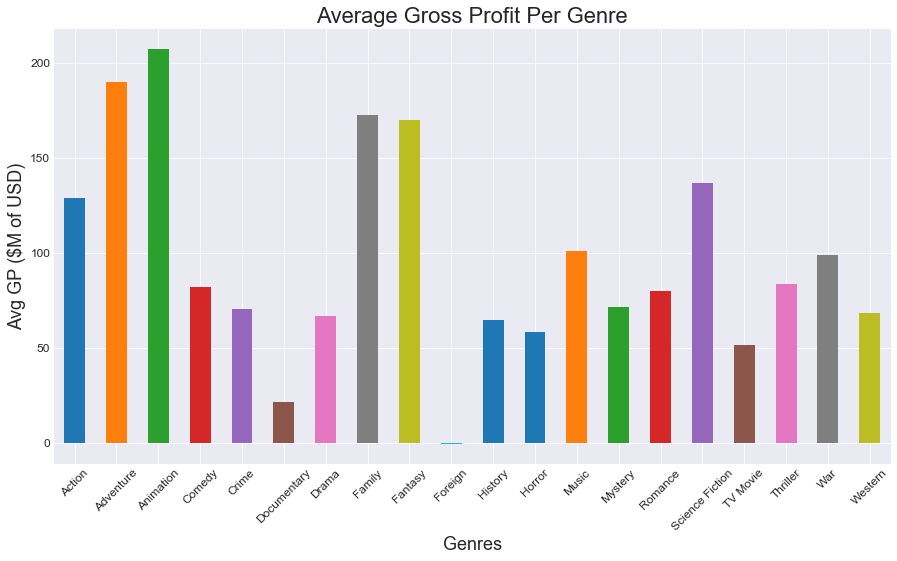

In [499]:
plt.figure(figsize=(15,8))
df_gen_gp.groupby('genre')['gross_profit'].mean().plot(kind='bar', rot=45)
plt.title('Average Gross Profit Per Genre', fontsize = 22)
plt.xlabel('Genres', fontsize = 18)
plt.ylabel('Avg GP ($M of USD)', fontsize = 18);

There are certain genres that just naturally performs better in terms of financial gains. Such as animation, adventure or family movie, followed closely by fantasyt movie. As for foreign movie, they do not do very well in terms of finances. 

#### 2 - D. Top director and profit

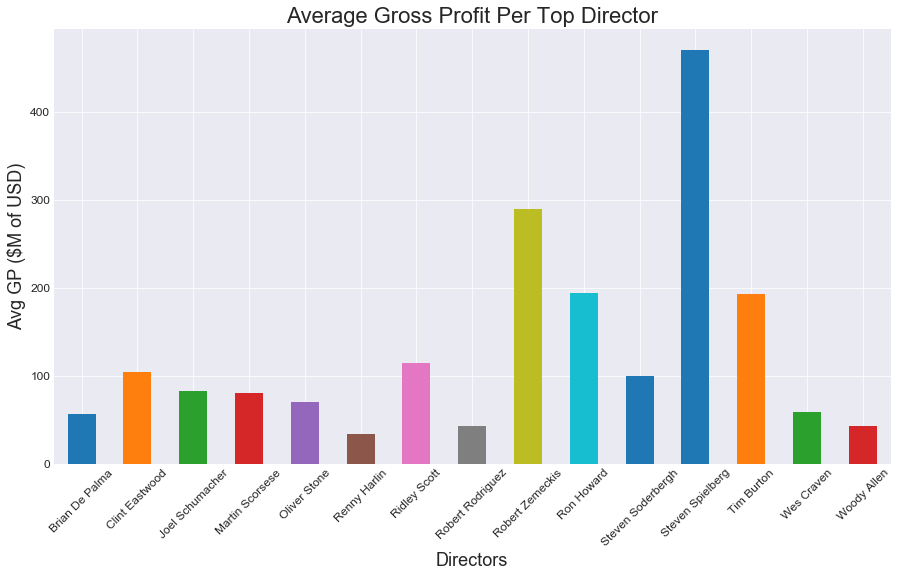

In [208]:
top_dir = df_p_dir.director.tolist()

plt.figure(figsize=(15,8))
df_dir.query('director == @top_dir').groupby('director').gross_profit.mean().plot(kind='bar', rot=45)
plt.title('Average Gross Profit Per Top Director', fontsize = 22)
plt.xlabel('Directors', fontsize = 18)
plt.ylabel('Avg GP ($M of USD)', fontsize = 18);

As for average revenue of top directors, one stands out being Steven Spielberg.

#### 2 - #. Top actor and profit

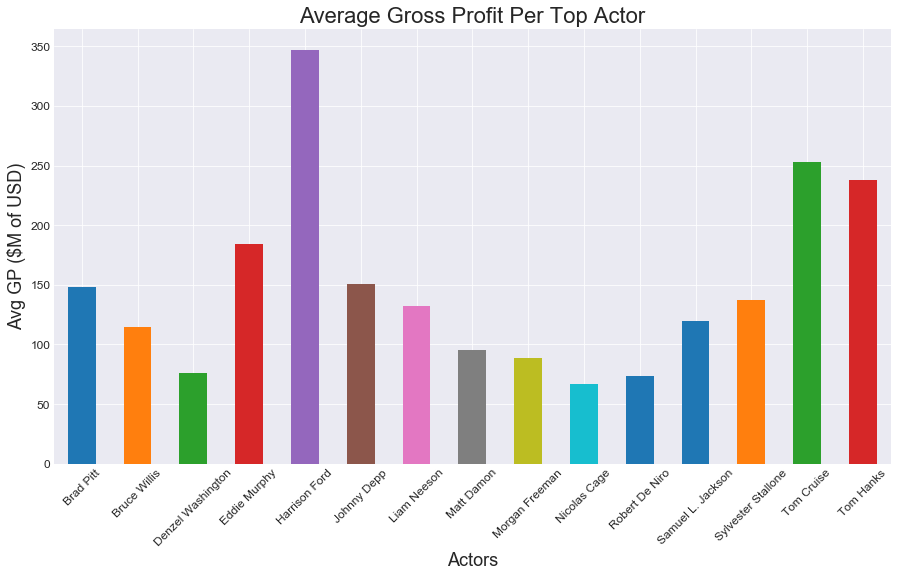

In [210]:
top_cast = df_p_cast.cast.tolist()

plt.figure(figsize=(15,8))
df_cast.query('cast == @top_cast').groupby('cast').gross_profit.mean().plot(kind='bar', rot=45)
plt.title('Average Gross Profit Per Top Actor', fontsize = 22)
plt.xlabel('Actors', fontsize = 18)
plt.ylabel('Avg GP ($M of USD)', fontsize = 18);

The same goes for Harrison Ford, who had great success for the producers in the movies the he stared in.

<a id='conclusions'></a>
## Conclusions

Based on the analysis of most highly liked movies. If a movies has been highly liked, meaning given really great average votes, it's highly likely that it is either a documentary, war, animation or western movie, with Martin Scorsese or Robert Zimickis as the director, featuring either Tom Hanks, Bradd Pitt, Denzel Washington or Robert De Niro. Although these specific combinations does not exisit, there would be people who are interested to see it for sure.

As far as the financial analysis goes, for a movie to be financial succesful (having higher than average gross profit), that movie should be animation, adventure or family movie, but absolutely not a foregin movie. With Steven Spielberg directring it and staring Harrison Ford.

Sources

split columns:
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html

Renaming columns:
https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

Plotting 2 bars in one single graph:
https://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis/24183505

Create a column based on a condition in pandas:
https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/